In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 1.0
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_1.0_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_1.0_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	607.1243

Best Fitness:	605.6684
Solution:	600.0000
Diff:		5.6684

[0:39:38][----------] 1.96% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	604.6977

Best Fitness:	603.7121
Solution:	600.0000
Diff:		3.7121

[1:16:45][----------] 3.92% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	613.0575

Best Fitness:	611.0084
Solution:	600.0000
Diff:		11.0084

[1:54:12][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	605.2895

Best Fitness:	604.3030
Solution:	600.0000
Diff:		4.3030

[2:32:37][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	611.5275

Best Fitness:	609.1495
Solution:	600.0000
Diff:		9.1495

[3:08:01][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	606.4651

Best Fitness:	605.1735
Solution:	600.0000
Diff:		5.1735

[3:41:12][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	602.2213

Best Fitness:	601.8239
Solution:	600.0000
Diff:		1.8239

[4:15:07][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	606.7416

Best Fitness:	605.3755
Solution:	600.0000
Diff:		5.3755

[4:48:37][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	607.9931

Best Fitness:	606.6390
Solution:	600.0000
Diff:		6.6390

[5:22:10][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	605.5527

Best Fitness:	604.6561
Solution:	600.0000
Diff:		4.6561

[5:53:38][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	606.5846

Best Fitness:	605.2665
Solution:	600.0000
Diff:		5.2665

[6:23:30][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	609.1323

Best Fitness:	607.7499
Solution:	600.0000
Diff:		7.7499

[6:53:00][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	606.8388

Best Fitness:	605.3877
Solution:	600.0000
Diff:		5.3877

[7:22:29][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.0137

Best Fitness:	602.4012
Solution:	600.0000
Diff:		2.4012

[7:52:04][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	605.3868

Best Fitness:	604.2521
Solution:	600.0000
Diff:		4.2521

[8:20:43][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	602.0869

Best Fitness:	601.7192
Solution:	600.0000
Diff:		1.7192

[8:46:42][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	609.3691

Best Fitness:	607.7122
Solution:	600.0000
Diff:		7.7122

[9:12:43][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	605.1081

Best Fitness:	604.0236
Solution:	600.0000
Diff:		4.0236

[9:39:08][####------] 35.29% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.9832

Best Fitness:	603.0880
Solution:	600.0000
Diff:		3.0880

[10:04:58][####------] 37.25% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	605.8958

Best Fitness:	604.8521
Solution:	600.0000
Diff:		4.8521

[10:30:46][####------] 39.22% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	604.7840

Best Fitness:	604.1097
Solution:	600.0000
Diff:		4.1097

[10:55:40][####------] 41.18% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.0630

Best Fitness:	602.3974
Solution:	600.0000
Diff:		2.3974

[11:19:45][####------] 43.14% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.3532

Best Fitness:	602.5295
Solution:	600.0000
Diff:		2.5295

[11:43:07][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.5581

Best Fitness:	602.7934
Solution:	600.0000
Diff:		2.7934

[12:06:04][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.6396

Best Fitness:	603.0057
Solution:	600.0000
Diff:		3.0057

[12:27:44][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	601.7869

Best Fitness:	601.4007
Solution:	600.0000
Diff:		1.4007

[12:47:55][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	604.6701

Best Fitness:	603.6659
Solution:	600.0000
Diff:		3.6659

[13:07:05][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	609.0033

Best Fitness:	607.3625
Solution:	600.0000
Diff:		7.3625

[13:25:50][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	606.6083

Best Fitness:	605.3508
Solution:	600.0000
Diff:		5.3508

[13:44:05][######----] 56.86% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	602.9975

Best Fitness:	602.2313
Solution:	600.0000
Diff:		2.2313

[14:00:46][######----] 58.82% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.7102

Best Fitness:	602.6743
Solution:	600.0000
Diff:		2.6743

[14:16:27][######----] 60.78% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	604.8217

Best Fitness:	604.1803
Solution:	600.0000
Diff:		4.1803

[14:31:09][######----] 62.75% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	617.1389

Best Fitness:	613.2369
Solution:	600.0000
Diff:		13.2369

[14:45:45][######----] 64.71% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	611.1054

Best Fitness:	608.8872
Solution:	600.0000
Diff:		8.8872

[15:00:18][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	604.0797

Best Fitness:	603.3493
Solution:	600.0000
Diff:		3.3493

[15:13:48][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	606.9723

Best Fitness:	605.4239
Solution:	600.0000
Diff:		5.4239

[15:26:10][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	602.5645

Best Fitness:	601.9740
Solution:	600.0000
Diff:		1.9740

[15:37:28][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.4095

Best Fitness:	602.5093
Solution:	600.0000
Diff:		2.5093

[15:49:46][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	605.1016

Best Fitness:	604.1376
Solution:	600.0000
Diff:		4.1376

[16:00:54][########--] 76.47% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	604.7747

Best Fitness:	603.7146
Solution:	600.0000
Diff:		3.7146

[16:11:01][########--] 78.43% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	604.3313

Best Fitness:	603.4808
Solution:	600.0000
Diff:		3.4808

[16:21:07][########--] 80.39% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	604.8788

Best Fitness:	603.8777
Solution:	600.0000
Diff:		3.8777

[16:30:41][########--] 82.35% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.8308

Best Fitness:	603.0304
Solution:	600.0000
Diff:		3.0304

[16:39:39][########--] 84.31% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	605.5984

Best Fitness:	604.3890
Solution:	600.0000
Diff:		4.3890

[16:48:19][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	602.3528

Best Fitness:	601.7375
Solution:	600.0000
Diff:		1.7375

[16:56:15][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	612.5957

Best Fitness:	610.5730
Solution:	600.0000
Diff:		10.5730

[17:04:13][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	604.1599

Best Fitness:	603.3268
Solution:	600.0000
Diff:		3.3268

[17:11:52][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.6750

Best Fitness:	602.8272
Solution:	600.0000
Diff:		2.8272

[17:19:28][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	605.8109

Best Fitness:	604.3921
Solution:	600.0000
Diff:		4.3921

[17:27:00][##########] 96.08% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	605.9990

Best Fitness:	604.8070
Solution:	600.0000
Diff:		4.8070

[17:34:17][##########] 98.04% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	603.0157

Best Fitness:	602.3408
Solution:	600.0000
Diff:		2.3408

[17:41:52][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

17:41:52

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
990,2.875347,3.340468,2.917855,2.988332,3.123211,3.347945,2.876764,3.249752,2.794404,3.050531,...,3.035329,2.543255,3.285897,3.11944,2.94035,2.71589,2.591826,3.045572,3.417219,50
991,2.875347,3.047196,2.917855,2.988332,3.123211,2.856828,2.876764,3.249752,2.794404,3.050531,...,3.035329,2.543255,3.285897,3.11944,2.94035,2.71589,2.591826,3.045572,3.417219,50
992,2.875347,3.047196,2.917855,2.988332,3.123211,2.856828,2.876764,3.249752,2.794404,3.050531,...,3.035329,2.543255,3.285897,3.11944,2.94035,2.71589,2.591826,3.045572,3.417219,50
993,2.875347,3.047196,2.917855,2.988332,3.123211,2.856828,2.876764,3.249752,2.794404,3.050531,...,3.035329,2.543255,3.285897,3.11944,2.94035,2.71589,2.591826,3.045572,3.417219,50
994,2.875347,3.047196,2.917855,2.784514,3.123211,2.856828,2.876764,3.186165,2.794404,3.050531,...,3.035329,2.543255,3.285897,3.11944,2.94035,2.71589,2.591826,3.045572,3.417219,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 5.668449444402313

Best error for run 1: 3.7120602545869588

Best error for run 2: 11.008423785183254

Best error for run 3: 4.303033316003848

Best error for run 4: 9.149517491894926

Best error for run 5: 5.1734791835380065

Best error for run 6: 1.823876032835983

Best error for run 7: 5.375492001281486

Best error for run 8: 6.639008768171266

Best error for run 9: 4.656107267339507

Best error for run 10: 5.266515717885113

Best error for run 11: 7.749860424485291

Best error for run 12: 5.387718077141017

Best error for run 13: 2.4011974502999465

Best error for run 14: 4.252112173835258

Best error for run 15: 1.7192016503971672

Best error for run 16: 7.712168990579698

Best error for run 17: 4.0235826112938184

Best error for run 18: 3.0879765422540686

Best error for run 19: 4.852125317751643

Best error for run 20: 4.109705926906827

Best error for run 21: 2.3973842383345527

Best error for run 22: 2.5294620577063824

Best error for run 23: 2.7933693110417153

Best error for run 24: 3.00574236410273

Best error for run 25: 1.4007208464473706

Best error for run 26: 3.6659136677008064

Best error for run 27: 7.36253280429321

Best error for run 28: 5.350787705180323

Best error for run 29: 2.231345893442949

Best error for run 30: 2.674330942599454

Best error for run 31: 4.1803143384320265

Best error for run 32: 13.236899916103766

Best error for run 33: 8.887179949534698

Best error for run 34: 3.3492600147006897

Best error for run 35: 5.423892813591124

Best error for run 36: 1.9739605982699686

Best error for run 37: 2.5092519889731193

Best error for run 38: 4.137589483183319

Best error for run 39: 3.7146448329699524

Best error for run 40: 3.480796362482806

Best error for run 41: 3.877686296309207

Best error for run 42: 3.030350699958035

Best error for run 43: 4.388989789902553

Best error for run 44: 1.7375374671737518

Best error for run 45: 10.572981139560056

Best error for run 46: 3.3267760306318905

Best error for run 47: 2.8272227177743616

Best error for run 48: 4.392119601605032

Best error for run 49: 4.80702592760349

Best error for run 50: 2.3408345137423794

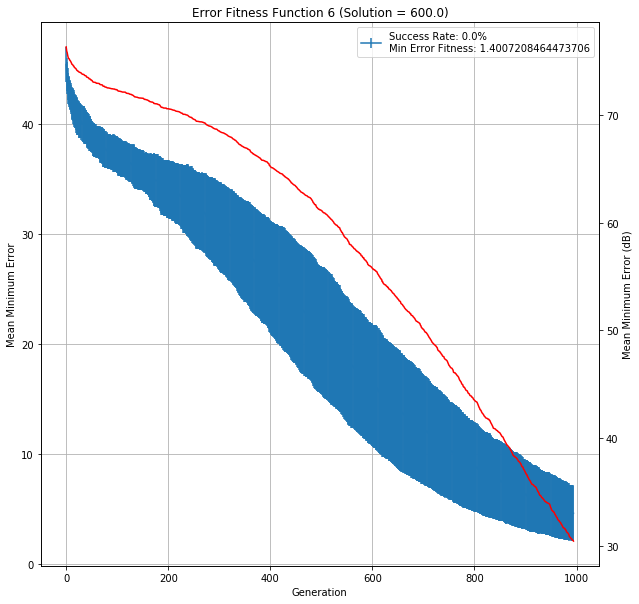

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_1.0_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,1.0,5.668449,3.71206,11.008424,4.303033,9.149517,5.173479,...,1.737537,10.572981,3.326776,2.827223,4.39212,4.807026,2.340835,4.581932,17:41:52,299100
